# Objective
**- To classify the given leaf image as healthy, late blight or early blight**<br>
**- Multiclass classification problem**<br>

# Data
**-The dataset is originally collected from
[kaggle.com](https://www.kaggle.com/arjuntejaswi/plant-village)**<br>
**- A subset of the original data is created which includes only the diseases of potato plants**<br>
**- Dataset used in this project -
[click here!](https://www.kaggle.com/ashokkumarpalivela/potato-diseases)**

#### Folder structure
- data
    - Late Blight
        - img1.png
        - img2.png
        - ...
    - Early Blight
        - img1.png
        - img2.png
        - ...
    - Healthy
        - img1.png
        - img2.png
        - ...

# Dependencies

In [31]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

print(tf.__version__)
############ settings ############
data_dir = r"..\data"

batch_size = 32
img_height = 128
img_width = 128

2.16.1


# Data preprocessing

**- Loading and splitting data<br>**
**- Train:80% and Validation:20%**

In [32]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2152 files belonging to 3 classes.
Using 1722 files for training.
Found 2152 files belonging to 3 classes.
Using 430 files for validation.


# EDA

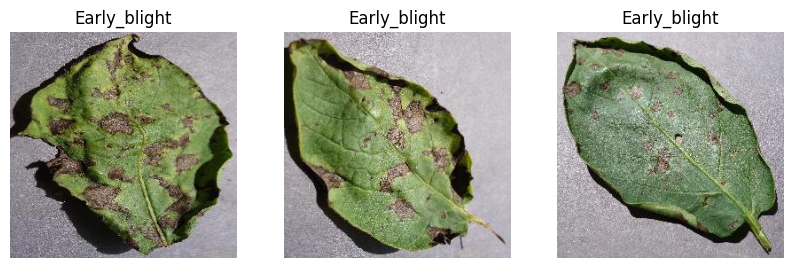

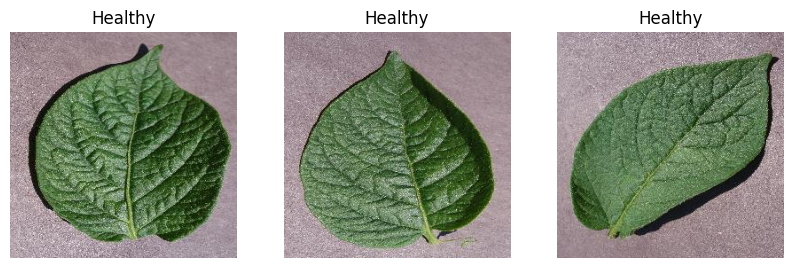

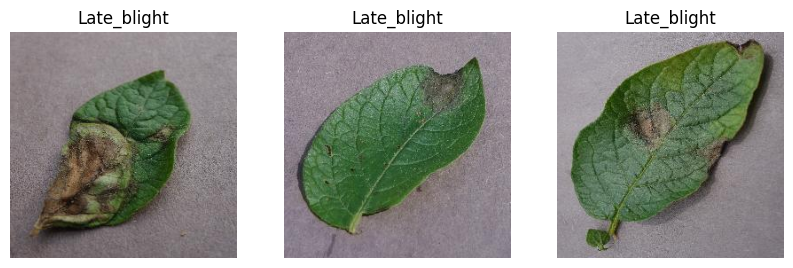

In [33]:
## Sample images
class_names = train_ds.class_names

for class_name in class_names:
    imgs = os.listdir(os.path.join(data_dir, class_name))[:3]
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(imgs):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(plt.imread(os.path.join(data_dir, class_name, img)))
        plt.title(class_name)
        plt.axis('off')

# Model Training

In [34]:


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [35]:
# Model architecture
num_classes = 3

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                    min_delta=0.0001,
                                                    patience=4,
)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    callbacks=[earlystop_callback]
                    )


Epoch 1/20


c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.4846 - loss: 0.9158 - val_accuracy: 0.6907 - val_loss: 0.7061
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.7397 - loss: 0.6241 - val_accuracy: 0.8256 - val_loss: 0.4268
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.8406 - loss: 0.4291 - val_accuracy: 0.8395 - val_loss: 0.4397
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8696 - loss: 0.3527 - val_accuracy: 0.8767 - val_loss: 0.3147
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9067 - loss: 0.2672 - val_accuracy: 0.8930 - val_loss: 0.2307
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9170 - loss: 0.2142 - val_accuracy: 0.9349 - val_loss: 0.1854
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9546 - loss: 0.1631 - val_accuracy: 0.9698 - val_loss: 0.1113
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9607 - loss: 0.1073 - val_accuracy: 0.9512 - val_loss: 0.

# Model Evaluation

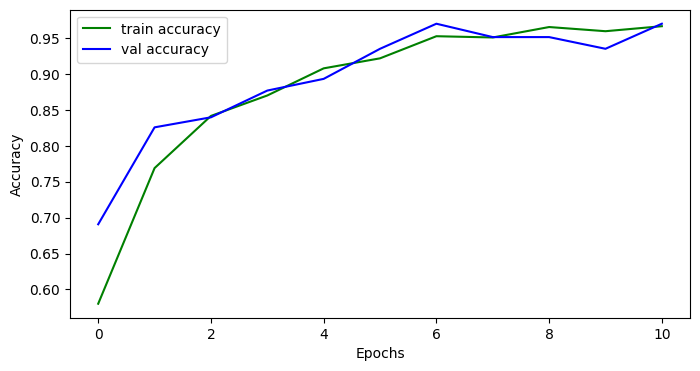

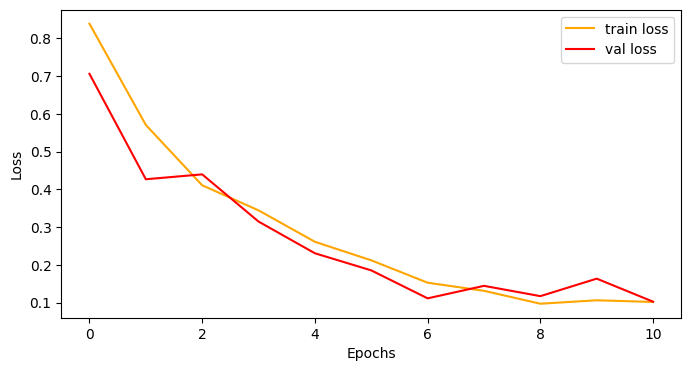

In [36]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

# Accuracy plots
plt.figure(figsize=(8, 4))
plt.plot(train_acc, color='green', linestyle='-', label='train accuracy')
plt.plot(valid_acc, color='blue', linestyle='-', label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss plots
plt.figure(figsize=(8, 4))
plt.plot(train_loss, color='orange', linestyle='-', label='train loss')
plt.plot(valid_loss, color='red', linestyle='-', label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
loss, acc = model.evaluate(val_ds, batch_size=batch_size)
print("validation accuracy :", round(acc, 2))
print("validation loss :", round(loss,2))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9674 - loss: 0.0961
validation accuracy : 0.97
validation loss : 0.1


In [38]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


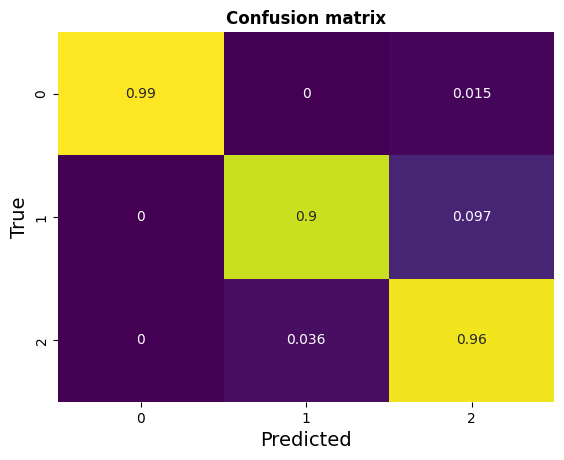

In [39]:
cm = confusion_matrix(correct_labels, predicted_labels, normalize='true')
sns.heatmap(cm, annot=True, cmap='viridis', cbar=None)
plt.title("Confusion matrix", fontweight='bold')
plt.ylabel("True", fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.show()

In [40]:
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       204
           1       0.80      0.90      0.85        31
           2       0.97      0.96      0.97       195

    accuracy                           0.97       430
   macro avg       0.92      0.95      0.94       430
weighted avg       0.97      0.97      0.97       430



# Post Processing

In [41]:
# Save
model.save("model_v1.h5")

In [42]:
def prediction(img): 
    class_names = ['Early_blight', 'Healthy', 'Late_blight'] 
    my_image = load_img(img, target_size=(img_height, img_width)) 
    my_image = img_to_array(my_image) 
    my_image = np.expand_dims(my_image, 0) 
    out = np.round(model.predict(my_image)[0], 2) 
    fig = plt.figure(figsize=(7, 4)) 
    plt.barh(class_names, out, color='lightgray',edgecolor='red', linewidth=1, height=0.5) 
    for index, value in enumerate(out): 
        plt.text(value/2 + 0.1, index, f"{100*value:.2f}%", fontweight='bold') 
        plt.xticks([]) 
        plt.yticks([0, 1, 2], labels=class_names, fontweight='bold', fontsize=14) 
        fig.savefig('pred_img.png', bbox_inches='tight') 
    return plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


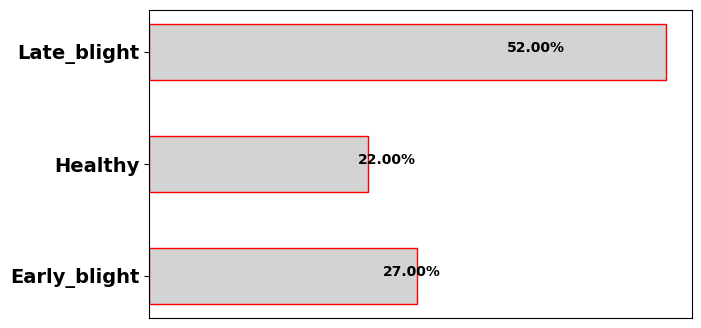

In [43]:
####### Prediction on single Image
img = '../data/Healthy/04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG'
prediction(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


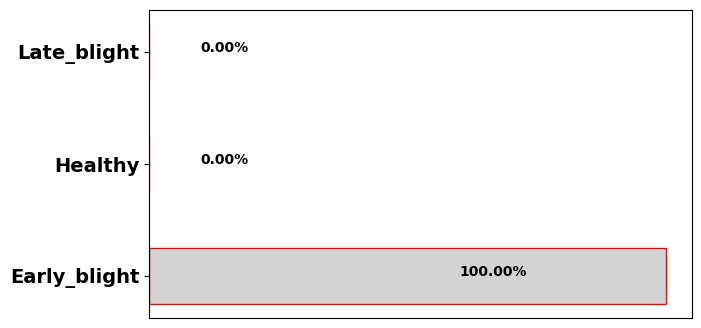

In [44]:
####### Prediction on single Image
img = '../data/Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG'
prediction(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


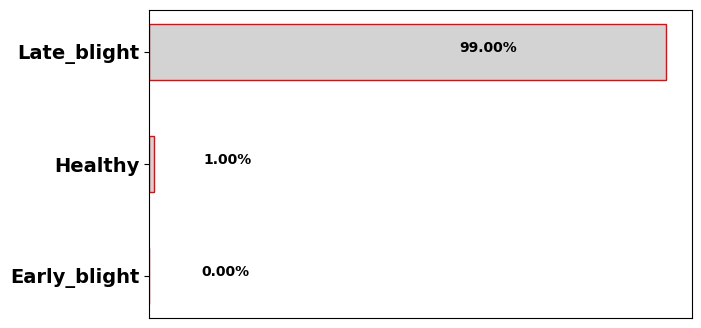

In [45]:
####### Prediction on single Image
img = '../data/Late_blight/01270f5c-a44b-4da7-9398-289088c197ab___RS_LB 2517.JPG'
prediction(img)